In [12]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    """State of the agent."""
    name: str
    age: str
    final: str

In [14]:
def first_node(state:AgentState) -> AgentState:
    """First node in the state graph."""
    state['final'] = f'Hi there {state["name"]}!'
    return state

def second_node(state:AgentState) -> AgentState:
    """Second node in the state graph."""
    state['final'] = state['final']+f' You are {state["age"]} years old.'
    return state

In [15]:
graph = StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_edge("first", "second")

graph.set_entry_point("first")
graph.set_finish_point("second")

app = graph.compile()

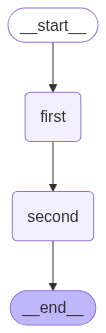

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"name": "John", "age": "30"})

In [18]:
result

{'name': 'John', 'age': '30', 'final': 'Hi there John! You are 30 years old.'}

In [19]:
result['final']

'Hi there John! You are 30 years old.'